<a href="https://colab.research.google.com/github/Jasminehan1112/codecode/blob/main/%E2%80%9CClass_python_week2_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Session 2

Now we are going to practice some analyses with our data

In [ ]:
# Load in our choice and demographic data
import pandas as pd


data=pd.read_csv("https://raw.githubusercontent.com/CaitlinLloyd/Psychology_Programming2025/refs/heads/main/Data/demo.csv")
choices=pd.read_csv("https://raw.githubusercontent.com/CaitlinLloyd/Psychology_Programming2025/refs/heads/main/Data/FCT_df.csv")

In [ ]:
choices

,Unnamed: 0,ID,block,trial_number,food,reaction_time,rating,fat,sugar
0,0,1,health,1,apple,2.68,7.0,high,low
1,1,1,health,2,beef,2.05,4.0,high,high
2,2,1,health,3,eggs,NaN,NaN,low,low
3,3,1,health,4,cookie,0.86,4.0,high,high
4,4,1,health,5,bacon,1.51,8.0,low,high
...,...,...,...,...,...,...,...,...,...
8995,8995,40,choice,71,toast,3.72,5.0,high,high
8996,8996,40,choice,72,pizza,0.95,8.0,high,low
8997,8997,40,choice,73,ice cream,3.36,6.0,high,low
8998,8998,40,choice,74,tofu,1.27,9.0,low,high


In [ ]:
df_merged = pd.merge(data, choices, on='ID', how='left',)


In [ ]:
df_merged.drop_duplicates(subset=['ID'], keep='first')

,Unnamed: 0_x,ID,Age,Patient,Medication,BMI,Fat (g),Calories,Protein (g),Sugar (g),EDE Score,Duration of Illness,Unnamed: 0_y,block,trial_number,food,reaction_time,rating,fat,sugar
0,0,1,56,Yes,Yes,17.9,6,365,4,25,4.9,1.9,0,health,1,apple,2.68,7.0,high,low
225,1,2,46,Yes,Yes,18.6,9,306,12,15,5.3,1.5,225,health,1,lettuce,3.84,4.0,low,high
450,2,3,32,No,Yes,22.3,24,635,36,20,0.6,NaN,450,health,1,lettuce,1.10,2.0,low,high
675,3,4,60,No,No,22.9,32,456,27,21,0.5,NaN,675,health,1,chocolate,1.04,2.0,high,high
900,4,5,25,Yes,No,15.7,11,332,16,17,4.1,9.6,900,health,1,cranberries,3.13,9.0,high,low
1125,5,6,38,Yes,No,17.2,12,318,9,14,3.5,8.6,1125,health,1,burger,3.64,10.0,high,high
1350,6,7,56,Yes,No,18.7,14,213,8,16,4.6,4.2,1350,health,1,yogurt,2.18,8.0,low,high
1575,7,8,36,Yes,No,17.2,14,317,10,18,4.2,9.6,1575,health,1,yogurt,1.30,7.0,low,high
1800,8,9,40,No,No,22.0,25,784,23,24,1.7,NaN,1800,health,1,turkey,1.63,5.0,high,low
2025,9,10,28,No,No,22.8,19,576,22,29,0.2,NaN,2025,health,1,eggs,3.06,7.0,low,low


In [ ]:
# Now summarize the means and reaction times for foods varying in fat and sugar

#Now let's create a new dataframe and store each persons average RT and rating for high and low fat foods

# Group by participant, block, and fat level
summary_df = (
    df_merged
    .dropna(subset=['rating', 'reaction_time'])  # Exclude trials with missing values
    .groupby(['ID', 'block', 'fat','sugar'])
    .agg(
        average_rating=('rating', 'mean'),
        average_reaction_time=('reaction_time', 'mean'),
        trial_count=('rating', 'count')  # Optional: to see how many valid trials per group
    )
    .reset_index()
)

print(summary_df.head())

   ID   block   fat sugar  average_rating  average_reaction_time  trial_count
0   1  choice  high  high        5.333333               1.997333           15
1   1  choice  high   low        6.055556               2.148889           18
2   1  choice   low  high        5.576923               2.175769           26
3   1  choice   low   low        5.312500               2.511875           16
4   1  health  high  high        4.888889               1.976667           18


In [ ]:
# Pivot to wide format
df_wide  = summary_df.pivot_table(
    index='ID',
    columns=['block', 'fat','sugar'],
    values=['average_rating', 'average_reaction_time']
)







In [ ]:
df_wide

average_rating                                                    \
block         choice                                  health             
fat             high                 low                high             
sugar           high       low      high       low      high       low   
ID                                                                       
1           5.333333  6.055556  5.576923  5.312500  4.888889  6.411765   
2           4.714286  6.352941  4.800000  5.050000  5.315789  4.125000   
3           5.421053  5.000000  6.050000  5.916667  4.222222  6.684211   
4           4.882353  4.461538  5.259259  6.312500  5.833333  5.352941   
5           5.444444  5.357143  5.421053  5.217391  6.142857  6.142857   
6           6.647059  6.400000  5.666667  4.750000  5.928571  5.190476   
7           6.647059  5.214286  6.285714  5.318182  5.000000  5.769231   
8           6.076923  6.294118  5.375000  5.684211  5.076923  5.500000   
9           6.444444  7.000000  4.333333  5.958333  5.409091  5.785714   
10          5.000000  4.473684  7.000000  6.357143  5.500000  5.684211   
11          4.800000  6.857143  5.062500  5.400000  5.444444  4.882353   
12          6.117647  5.611111  5.937500  6.863636  6.000000  6.333333   
13          5.937500  4.692308  6.105263  5.772727  5.846154  6.000000   
14          6.000000  5.434783  5.722222  5.666667  4.736842  4.555556   
15          5.875000  6.312500  5.650000  4.666667  6.529412  6.785714   
16          5.095238  6.071429  4.909091  4.941176  5.863636  7.083333   
17          4.666667  5.833333  5.235294  4.772727  5.826087  6.117647   
18          6.133333  5.611111  6.684211  5.590909  4.818182  4.869565   
19          5.461538  6.095238  4.761905  6.789474  6.444444  4.117647   
20          4.941176  5.166667  5.681818  5.478261  5.470588  5.750000   
21          5.444444  4.928571  4.700000  4.545455  5.615385  5.538462   
22          4.466667  6.000000  6.000000  5.833333  5.200000  4.933333   
23          5.333333  6.357143  6.285714  5.400000  5.650000  4.687500   
24          5.529412  7.200000  5.428571  5.050000  6.333333  5.266667   
25          5.611111  5.083333  5.461538  5.900000  4.600000  5.300000   
26          4.750000  4.714286  5.363636  6.833333  4.937500  5.466667   
27          5.454545  4.882353  6.000000  4.882353  6.529412  4.250000   
28          4.812500  4.909091  5.952381  5.923077  5.363636  5.050000   
29          5.733333  5.823529  5.944444  4.500000  4.631579  4.782609   
30          7.083333  5.850000  5.692308  5.466667  4.200000  5.958333   
31          5.470588  5.733333  6.173913  5.550000  5.375000  5.153846   
32          5.916667  4.764706  5.038462  5.000000  5.952381  5.375000   
33          5.727273  5.904762  5.560000  4.941176  5.615385  6.400000   
34          4.157895  5.809524  5.500000  5.571429  4.800000  5.636364   
35          6.444444  5.684211  4.857143  7.176471  5.294118  5.166667   
36          5.000000  5.866667  5.263158  5.695652  5.333333  5.500000   
37          5.000000  4.187500  6.333333  4.850000  5.214286  5.866667   
38          6.307692  4.437500  5.217391  5.772727  4.538462  5.500000   
39          4.857143  4.833333  6.083333  5.416667  4.714286  4.416667   
40          5.583333  5.631579  4.375000  5.576923  5.923077  5.047619   

                                               ... average_reaction_time  \
block                         taste            ...                choice   
fat         low                high            ...                   low   
sugar      high       low      high       low  ...                  high   
ID                                             ...                         
1      5.913043  5.066667  5.466667  5.066667  ...              2.175769   
2      5.913043  4.875000  5.388889  5.571429  ...              2.439000   
3      6.200000  5.600000  5.500000  4.863636  ...              2.476500   
4      6.750000  6.222222  5.869565  5.500000  ...              2.2

In [ ]:
# Flatten the column names
df_wide.columns = [
    f"{val}_{block}_fat{fat}_sugar{sugar}"
    for val, block, fat, sugar in df_wide.columns
]

df_wide = df_wide.reset_index()
print(df_wide.head())

   ID  average_rating_choice_fathigh_sugarhigh  \
0   1                                 5.333333   
1   2                                 4.714286   
2   3                                 5.421053   
3   4                                 4.882353   
4   5                                 5.444444   

   average_rating_choice_fathigh_sugarlow  \
0                                6.055556   
1                                6.352941   
2                                5.000000   
3                                4.461538   
4                                5.357143   

   average_rating_choice_fatlow_sugarhigh  \
0                                5.576923   
1                                4.800000   
2                                6.050000   
3                                5.259259   
4                                5.421053   

   average_rating_choice_fatlow_sugarlow  \
0                               5.312500   
1                               5.050000   
2                        

In [ ]:
# now select some columns from the demographic frame and merge with our wide_df
demo_sub=data[['ID','Patient','BMI','EDE Score','Age']]


In [ ]:
demo_sub=pd.merge(demo_sub,df_wide,on='ID',how='left')

In [ ]:
demo_sub

,ID,Patient,BMI,EDE Score,Age,average_rating_choice_fathigh_sugarhigh,average_rating_choice_fathigh_sugarlow,average_rating_choice_fatlow_sugarhigh,average_rating_choice_fatlow_sugarlow,average_rating_health_fathigh_sugarhigh,...,average_reaction_time_choice_fatlow_sugarhigh,average_reaction_time_choice_fatlow_sugarlow,average_reaction_time_health_fathigh_sugarhigh,average_reaction_time_health_fathigh_sugarlow,average_reaction_time_health_fatlow_sugarhigh,average_reaction_time_health_fatlow_sugarlow,average_reaction_time_taste_fathigh_sugarhigh,average_reaction_time_taste_fathigh_sugarlow,average_reaction_time_taste_fatlow_sugarhigh,average_reaction_time_taste_fatlow_sugarlow
0,1,Yes,17.9,4.9,56,5.333333,6.055556,5.576923,5.312500,4.888889,...,2.175769,2.511875,1.976667,1.978235,1.944348,2.838667,2.131333,2.360667,2.097000,2.208000
1,2,Yes,18.6,5.3,46,4.714286,6.352941,4.800000,5.050000,5.315789,...,2.439000,2.123000,2.256316,2.758750,2.086522,2.295833,2.171111,2.287143,2.273500,2.128182
2,3,No,22.3,0.6,32,5.421053,5.000000,6.050000,5.916667,4.222222,...,2.476500,2.435417,1.810000,2.247368,2.176000,2.136400,2.181875,2.464545,2.211579,2.096667
3,4,No,22.9,0.5,60,4.882353,4.461538,5.259259,6.312500,5.833333,...,2.267037,2.182500,2.307778,2.170588,2.108500,2.018333,2.093043,2.081000,1.867000,2.108500
4,5,Yes,15.7,4.1,25,5.444444,5.357143,5.421053,5.217391,6.142857,...,2.062632,2.337826,2.427857,2.234286,2.555833,2.189130,2.252667,1.963636,2.265455,2.099630
5,6,Yes,17.2,3.5,38,6.647059,6.400000,5.666667,4.750000,5.928571,...,2.444444,2.656250,2.175000,2.060000,2.025000,2.566500,2.400952,2.225000,2.108000,2.526316
6,7,Yes,18.7,4.6,56,6.647059,5.214286,6.285714,5.318182,5.000000,...,1.920952,2.303636,2.341000,2.266923,2.211304,2.291053,2.748889,2.758667,2.316522,1.485882
7,8,Yes,17.2,4.2,36,6.076923,6.294118,5.375000,5.684211,5.076923,...,2.215833,2.490526,2.083846,2.222500,1.908333,2.111429,2.855625,2.147500,2.400000,1.908421
8,9,No,22.0,1.7,40,6.444444,7.000000,4.333333,5.958333,5.409091,...,1.991250,2.411667,2.359091,2.022857,1.825652,2.031333,2.254286,2.166154,2.113333,2.449565
9,10,No,22.8,0.2,28,5.000000,4.473684,7.000000,6.357143,5.500000,...,2.410588,2.347143,2.125000,2.693158,2.651176,2.317692,2.486842,2.321739,2.087917,2.232222


In [ ]:
# now let's group by patient group and calculate means of food ratings, BMI, age, EDEQ
# we first need to import numpy


In [ ]:
# mean is np.mean()
import numpy as np
np.mean(demo_sub.BMI)

np.float64(20.252499999999998)

In [ ]:
#group the demo_sub data frame by patient status and calculate mean BMI
# Group by participant, block, and fat level
demo_sub
    .groupby(['Patient'])
    .agg(
        average_rating=('rating', 'mean'),
        average_reaction_time=('reaction_time', 'mean'),
        trial_count=('rating', 'count')  # Optional: to see how many valid trials per group
    )
    .reset_index()
)


# how else can we do it - without using group by

In [ ]:
demo_sub.groupby(['Patient']).mean('BMI')

,ID,BMI,EDE Score,Age,average_rating_choice_fathigh_sugarhigh,average_rating_choice_fathigh_sugarlow,average_rating_choice_fatlow_sugarhigh,average_rating_choice_fatlow_sugarlow,average_rating_health_fathigh_sugarhigh,average_rating_health_fathigh_sugarlow,...,average_reaction_time_choice_fatlow_sugarhigh,average_reaction_time_choice_fatlow_sugarlow,average_reaction_time_health_fathigh_sugarhigh,average_reaction_time_health_fathigh_sugarlow,average_reaction_time_health_fatlow_sugarhigh,average_reaction_time_health_fatlow_sugarlow,average_reaction_time_taste_fathigh_sugarhigh,average_reaction_time_taste_fathigh_sugarlow,average_reaction_time_taste_fatlow_sugarhigh,average_reaction_time_taste_fatlow_sugarlow
Patient,,,,,,,,,,,,,,,,,,,,,
No,21.421053,23.510526,1.084211,39.473684,5.445592,5.622704,5.718976,5.515711,5.400816,5.464300,...,2.301567,2.240091,2.254582,2.265509,2.314613,2.210020,2.228634,2.272836,2.226039,2.259145
Yes,19.666667,17.304762,4.400000,43.857143,5.564597,5.526902,5.432739,5.566949,5.404911,5.457917,...,2.200725,2.356474,2.332249,2.189332,2.238044,2.368078,2.317387,2.221597,2.180668,2.201145


In [ ]:
np.mean(demo_sub.BMI[demo_sub.Patient=="Yes"])

np.float64(17.304761904761904)

In [ ]:
np.mean(demo_sub['BMI'])

np.float64(20.252499999999998)

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

In [ ]:
# now lets compare the groups using a t-test
vars_to_test=['BMI','Age']
# Split the data by group
patients = demo_sub[demo_sub['Patient'] == 'Yes']
controls = demo_sub[demo_sub['Patient'] == 'No']

# Store results
results = []

for hi in vars_to_test:
    # Run t-test
    t_stat, p_val = ttest_ind(patients['BMI'], controls['BMI'], equal_var=False)  # Welch's t-test

    results.append({
        'variable': hi,
        'mean_patient': patients[hi].mean(),
        'mean_control': controls[hi].mean(),
        't_stat': t_stat,
        'p_value': p_val
    })

# Convert to DataFrame
ttest_results = pd.DataFrame(results)
print(ttest_results)

  variable  mean_patient  mean_control     t_stat       p_value
0      BMI     17.304762     23.510526 -10.791807  1.388539e-11
1      Age     43.857143     39.473684 -10.791807  1.388539e-11


What do these data tell us?

In [ ]:
# Now let's average across the high and low sugar foods for each person - we need to create a new variable
demo_sub['high_fat_choice']=(demo_sub.average_rating_choice_fathigh_sugarhigh+demo_sub.average_rating_choice_fathigh_sugarlow) / 2
demo_sub['low_fat_choice']=(demo_sub.average_rating_choice_fatlow_sugarhigh+demo_sub.average_rating_choice_fatlow_sugarlow) / 2


In [ ]:
demo_sub

,ID,Patient,BMI,EDE Score,Age,average_rating_choice_fathigh_sugarhigh,average_rating_choice_fathigh_sugarlow,average_rating_choice_fatlow_sugarhigh,average_rating_choice_fatlow_sugarlow,average_rating_health_fathigh_sugarhigh,...,average_reaction_time_health_fathigh_sugarhigh,average_reaction_time_health_fathigh_sugarlow,average_reaction_time_health_fatlow_sugarhigh,average_reaction_time_health_fatlow_sugarlow,average_reaction_time_taste_fathigh_sugarhigh,average_reaction_time_taste_fathigh_sugarlow,average_reaction_time_taste_fatlow_sugarhigh,average_reaction_time_taste_fatlow_sugarlow,high_fat_choice,low_fat_choice
0,1,Yes,17.9,4.9,56,5.333333,6.055556,5.576923,5.312500,4.888889,...,1.976667,1.978235,1.944348,2.838667,2.131333,2.360667,2.097000,2.208000,5.694444,5.444712
1,2,Yes,18.6,5.3,46,4.714286,6.352941,4.800000,5.050000,5.315789,...,2.256316,2.758750,2.086522,2.295833,2.171111,2.287143,2.273500,2.128182,5.533613,4.925000
2,3,No,22.3,0.6,32,5.421053,5.000000,6.050000,5.916667,4.222222,...,1.810000,2.247368,2.176000,2.136400,2.181875,2.464545,2.211579,2.096667,5.210526,5.983333
3,4,No,22.9,0.5,60,4.882353,4.461538,5.259259,6.312500,5.833333,...,2.307778,2.170588,2.108500,2.018333,2.093043,2.081000,1.867000,2.108500,4.671946,5.785880
4,5,Yes,15.7,4.1,25,5.444444,5.357143,5.421053,5.217391,6.142857,...,2.427857,2.234286,2.555833,2.189130,2.252667,1.963636,2.265455,2.099630,5.400794,5.319222
5,6,Yes,17.2,3.5,38,6.647059,6.400000,5.666667,4.750000,5.928571,...,2.175000,2.060000,2.025000,2.566500,2.400952,2.225000,2.108000,2.526316,6.523529,5.208333
6,7,Yes,18.7,4.6,56,6.647059,5.214286,6.285714,5.318182,5.000000,...,2.341000,2.266923,2.211304,2.291053,2.748889,2.758667,2.316522,1.485882,5.930672,5.801948
7,8,Yes,17.2,4.2,36,6.076923,6.294118,5.375000,5.684211,5.076923,...,2.083846,2.222500,1.908333,2.111429,2.855625,2.147500,2.400000,1.908421,6.185520,5.529605
8,9,No,22.0,1.7,40,6.444444,7.000000,4.333333,5.958333,5.409091,...,2.359091,2.022857,1.825652,2.031333,2.254286,2.166154,2.113333,2.449565,6.722222,5.145833
9,10,No,22.8,0.2,28,5.000000,4.473684,7.000000,6.357143,5.500000,...,2.125000,2.693158,2.651176,2.317692,2.486842,2.321739,2.087917,2.232222,4.736842,6.678571


In [ ]:
# Now do some plots to show associations between two variables
import matplotlib.pyplot as plt
import seaborn as sns



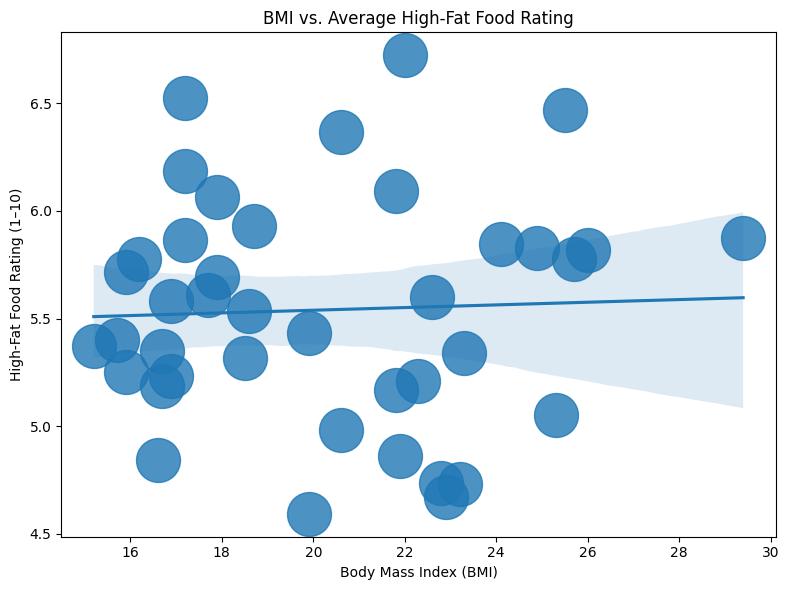

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=demo_sub, x='BMI', y='high_fat_choice', scatter_kws={'s': 1000})


plt.title('BMI vs. Average High-Fat Food Rating')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('High-Fat Food Rating (1–10)')
plt.grid(False)
plt.tight_layout()
plt.show()

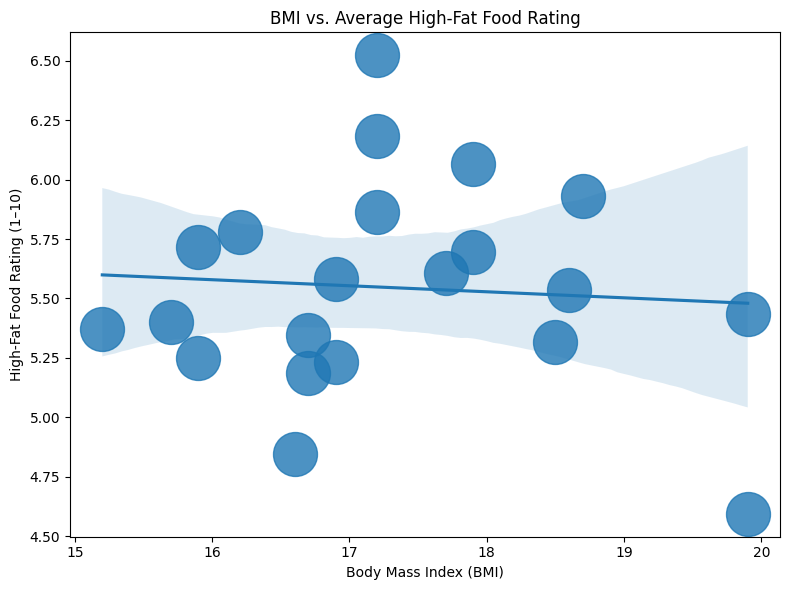

In [ ]:
# plot patient group only
patient_df=demo_sub[demo_sub['Patient']=='Yes']

# make a patient only df from demo_sub
plt.figure(figsize=(8, 6))
sns.regplot(data=patient_df, x='BMI', y='high_fat_choice', scatter_kws={'s': 1000})


plt.title('BMI vs. Average High-Fat Food Rating')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('High-Fat Food Rating (1–10)')
plt.grid(False)
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

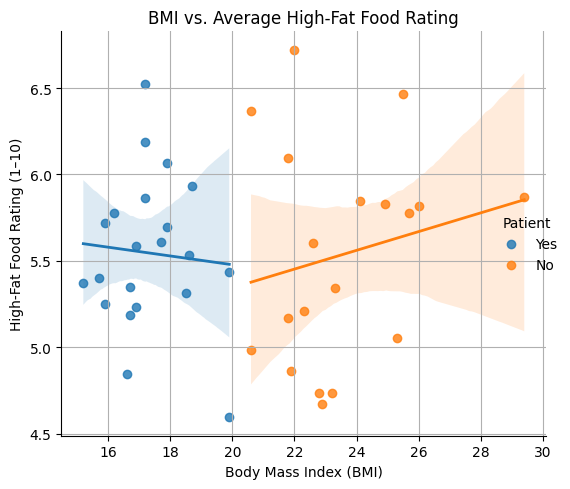

In [ ]:
# color by patient group
plt.figure(figsize=(8, 6))
sns.lmplot(data=demo_sub, x='BMI', y='high_fat_choice', hue='Patient',line_kws={'linewidth': 2})
plt.title('BMI vs. Average High-Fat Food Rating')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('High-Fat Food Rating (1–10)')
plt.grid(True)
plt.tight_layout()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set'

<Figure size 800x600 with 0 Axes>

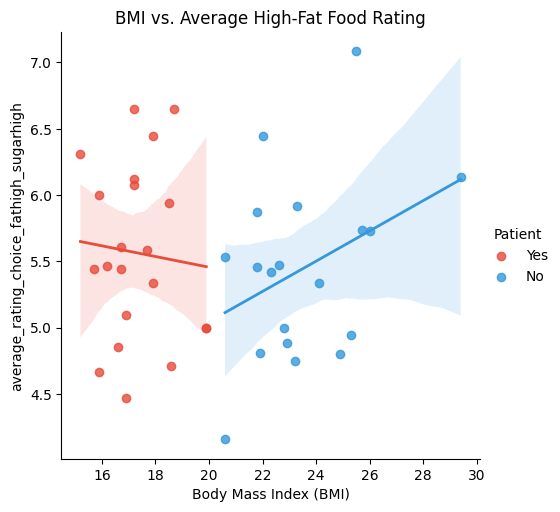

In [ ]:
#We can change the colors using a custom palette

custom_palette = {
    'Yes': '#E74C3C',   # red
    'No': '#3498DB'    # blue
}

# color by patient group
plt.figure(figsize=(8, 6))


sns.lmplot(data=demo_sub, x='BMI', y='average_rating_choice_fathigh_sugarhigh', hue='Patient',line_kws={'linewidth': 2},palette=custom_palette)
plt.title('BMI vs. Average High-Fat Food Rating')
plt.xlabel('Body Mass Index (BMI)')
plt.set(xticks=[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

plt.ylabel('High-Fat Food Rating (1–10)')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

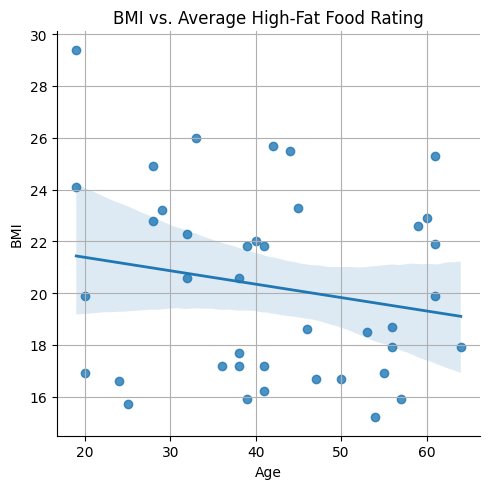

In [ ]:
plt.figure(figsize=(8, 6))


sns.lmplot(data=demo_sub, x='Age', y='BMI', line_kws={'linewidth': 2},palette=custom_palette)
plt.title('BMI vs. Average High-Fat Food Rating')
plt.xlabel('Age')


plt.ylabel('BMI')
plt.grid(True)
plt.tight_layout()
plt.show()


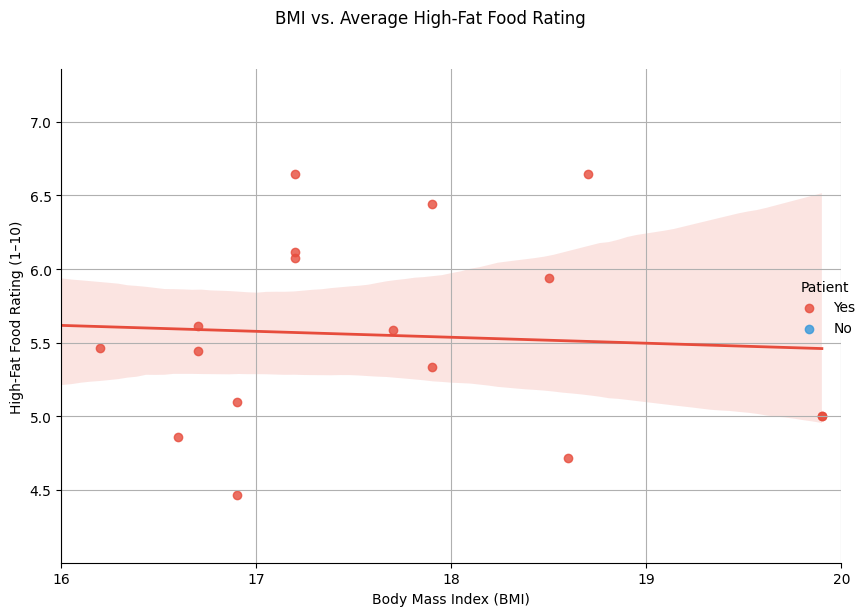

In [ ]:
# Create the lmplot (returns a FacetGrid object)
g = sns.lmplot(
    data=demo_sub,
    x='BMI',
    y='average_rating_choice_fathigh_sugarhigh',
    hue='Patient',
    line_kws={'linewidth': 2},
    palette=custom_palette,
    height=6,
    aspect=1.33  # This makes it 8x6 inches (6 * 1.33 = 8)
)

# Set title and labels using FacetGrid
g.set_axis_labels('Body Mass Index (BMI)', 'High-Fat Food Rating (1–10)')
g.set(xlim=(16, 20))  # Optional, to match your tick range

# Set x-axis ticks
g.set(xticks=[16, 17, 18, 19, 20])

# Add title
g.fig.suptitle('BMI vs. Average High-Fat Food Rating', y=1.02)  # Adjust y to avoid overlap

# Add grid
for ax in g.axes.flatten():
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# create a new variable for high sugar (mean of high and low fat foods with high sugar)
#plot against BMI

In [ ]:
# Advanced
# Try and plot, in the patient group only BMI against choice preference for high vs low fat

In [ ]:
# Let's also look at age

In [ ]:
# Now, let's use a regression model to compare patients and HC and adjust for age
import statsmodels.formula.api as smf

# Variables to test
variables = ['BMI']

results = []

for var in variables:
    # Formula: outcome ~ patient_status + age
    formula = f"{var} ~ C(Patient) + Age"

    # Fit linear model
    model = smf.ols(formula=formula, data=demo_sub).fit()

    # Extract results for patient_status (the group effect)
    coef = model.params.get('C(Patient)[T.Yes]', float('nan'))
    pval = model.pvalues.get('C(Patient)[T.Yes]', float('nan'))
    #print(model.summary())
    conf_int = model.conf_int().loc['C(Patient)[T.Yes]'].tolist()

    results.append({
        'variable': var,
        'coef_patient_vs_control': coef,
        'p_value': pval,
        'conf_lower': conf_int[0],
        'conf_upper': conf_int[1]
    })

# Convert to DataFrame and print
df_results = pd.DataFrame(results)
print(df_results)

  variable  coef_patient_vs_control       p_value  conf_lower  conf_upper
0      BMI                -6.148525  6.697756e-13    -7.31085     -4.9862


In [ ]:
demo_sub

,ID,Patient,BMI,EDE Score,Age,average_rating_choice_fathigh_sugarhigh,average_rating_choice_fathigh_sugarlow,average_rating_choice_fatlow_sugarhigh,average_rating_choice_fatlow_sugarlow,average_rating_health_fathigh_sugarhigh,...,average_reaction_time_choice_fatlow_sugarhigh,average_reaction_time_choice_fatlow_sugarlow,average_reaction_time_health_fathigh_sugarhigh,average_reaction_time_health_fathigh_sugarlow,average_reaction_time_health_fatlow_sugarhigh,average_reaction_time_health_fatlow_sugarlow,average_reaction_time_taste_fathigh_sugarhigh,average_reaction_time_taste_fathigh_sugarlow,average_reaction_time_taste_fatlow_sugarhigh,average_reaction_time_taste_fatlow_sugarlow
0,1,Yes,17.9,4.9,56,5.333333,6.055556,5.576923,5.312500,4.888889,...,2.175769,2.511875,1.976667,1.978235,1.944348,2.838667,2.131333,2.360667,2.097000,2.208000
1,2,Yes,18.6,5.3,46,4.714286,6.352941,4.800000,5.050000,5.315789,...,2.439000,2.123000,2.256316,2.758750,2.086522,2.295833,2.171111,2.287143,2.273500,2.128182
2,3,No,22.3,0.6,32,5.421053,5.000000,6.050000,5.916667,4.222222,...,2.476500,2.435417,1.810000,2.247368,2.176000,2.136400,2.181875,2.464545,2.211579,2.096667
3,4,No,22.9,0.5,60,4.882353,4.461538,5.259259,6.312500,5.833333,...,2.267037,2.182500,2.307778,2.170588,2.108500,2.018333,2.093043,2.081000,1.867000,2.108500
4,5,Yes,15.7,4.1,25,5.444444,5.357143,5.421053,5.217391,6.142857,...,2.062632,2.337826,2.427857,2.234286,2.555833,2.189130,2.252667,1.963636,2.265455,2.099630
5,6,Yes,17.2,3.5,38,6.647059,6.400000,5.666667,4.750000,5.928571,...,2.444444,2.656250,2.175000,2.060000,2.025000,2.566500,2.400952,2.225000,2.108000,2.526316
6,7,Yes,18.7,4.6,56,6.647059,5.214286,6.285714,5.318182,5.000000,...,1.920952,2.303636,2.341000,2.266923,2.211304,2.291053,2.748889,2.758667,2.316522,1.485882
7,8,Yes,17.2,4.2,36,6.076923,6.294118,5.375000,5.684211,5.076923,...,2.215833,2.490526,2.083846,2.222500,1.908333,2.111429,2.855625,2.147500,2.400000,1.908421
8,9,No,22.0,1.7,40,6.444444,7.000000,4.333333,5.958333,5.409091,...,1.991250,2.411667,2.359091,2.022857,1.825652,2.031333,2.254286,2.166154,2.113333,2.449565
9,10,No,22.8,0.2,28,5.000000,4.473684,7.000000,6.357143,5.500000,...,2.410588,2.347143,2.125000,2.693158,2.651176,2.317692,2.486842,2.321739,2.087917,2.232222


In [ ]:
# We can create interaction terms by using * (e.g., Patient * fat would be an interaction between Patient and fat content)
# Try now to examine whether patients and HC differ in choice ratings for high and low fat foods

demo_sub['high_fat_choice'] = demo_sub.average_rating_choice_fathigh_sugarhigh + demo_sub.average_rating_choice_fathigh_sugarlow
demo_sub['low_fat_choice'] = demo_sub.average_rating_choice_fathigh_sugarhigh + demo_sub.average_rating_choice_fathigh_sugarlow

long_vars=demo_sub[['ID','high_fat_choice','low_fat_choice','Patient','Age','BMI']]


long = pd.melt(long_vars,
                  id_vars=['ID'],
                  value_vars=['high_fat_choice','low_fat_choice'],
                  var_name='Fat',
                  value_name='Choice')

long=pd.merge(long,long_vars)




In [ ]:
formula = "Choice ~ C(Patient)*Fat + Age"


model = smf.mixedlm(formula=formula, data=long,groups="ID").fit()

# Extract results for patient_status (the group effect)
coef = model.params.get('C(Patient)[T.Yes]', float('nan'))
pval = model.pvalues.get('C(Patient)[T.Yes]', float('nan'))
conf_int = model.conf_int().loc['C(Patient)[T.Yes]'].tolist()

In [ ]:
# Is this significant?

In [ ]:
# Now try to group the demo df by patient status and correlate fat intake at meal and age

In [ ]:
data

,Unnamed: 0,ID,Age,Patient,Medication,BMI,Fat (g),Calories,Protein (g),Sugar (g),EDE Score,Duration of Illness
0,0,1,56,Yes,Yes,17.9,6,365,4,25,4.9,1.9
1,1,2,46,Yes,Yes,18.6,9,306,12,15,5.3,1.5
2,2,3,32,No,Yes,22.3,24,635,36,20,0.6,NaN
3,3,4,60,No,No,22.9,32,456,27,21,0.5,NaN
4,4,5,25,Yes,No,15.7,11,332,16,17,4.1,9.6
5,5,6,38,Yes,No,17.2,12,318,9,14,3.5,8.6
6,6,7,56,Yes,No,18.7,14,213,8,16,4.6,4.2
7,7,8,36,Yes,No,17.2,14,317,10,18,4.2,9.6
8,8,9,40,No,No,22.0,25,784,23,24,1.7,NaN
9,9,10,28,No,No,22.8,19,576,22,29,0.2,NaN


In [ ]:
vars_of_interest=['BMI','Calories']

grouped_corrs = data[vars_of_interest].corr()



# To access individual group's correlation matrix:
corr_patient = grouped_corrs.loc['Yes']
corr_control = grouped_corrs.loc['No']

In [ ]:
grouped_corrs = data[vars_of_interest].corr()


In [ ]:
grouped_corrs

,BMI,Calories
BMI,1.000000,0.742222
Calories,0.742222,1.000000


In [ ]:
## Next, load in the delay discounting data
data=pd.read_csv("https://raw.githubusercontent.com/CaitlinLloyd/Psychology_Programming2025/refs/heads/main/Data/DD_df.csv")

## Homework
Complete the tasks below and upload solution to Github

In [ ]:
data

,Unnamed: 0,participant_id,group,age,impulsivity,condition,trial,chose_delayed
0,0,1,SUD,32.483571,0.361736,control,1,1
1,1,1,SUD,32.483571,0.361736,control,2,1
2,2,1,SUD,32.483571,0.361736,control,3,0
3,3,1,SUD,32.483571,0.361736,control,4,0
4,4,1,SUD,32.483571,0.361736,control,5,0
...,...,...,...,...,...,...,...,...
9995,9995,100,control,30.291044,-1.142970,future,46,1
9996,9996,100,control,30.291044,-1.142970,future,47,1
9997,9997,100,control,30.291044,-1.142970,future,48,1
9998,9998,100,control,30.291044,-1.142970,future,49,1


In [ ]:
## Calculate the average number of delayed choices in patient and HC groups

# Group by participant, block, and fat level
summary_df = (
    data
    .groupby(['participant_id','chose_delayed'])
    .agg(
        trial_count=('trial', 'count')  # Optional: to see how many valid trials per group
    )
    .reset_index()
)

print(summary_df.head())

   participant_id  chose_delayed  trial_count
0               1              0           46
1               1              1           54
2               2              0           68
3               2              1           32
4               3              0           50


In [ ]:
demo=data[['participant_id','age','impulsivity','group']]
demo=demo.drop_duplicates(subset=['participant_id'])

In [ ]:
demo

,participant_id,age,impulsivity,group
0,1,32.483571,0.361736,SUD
100,2,33.238443,2.023030,SUD
200,3,28.829233,0.265863,SUD
300,4,37.896064,1.267435,SUD
400,5,27.652628,1.042560,SUD
...,...,...,...,...
9500,96,27.767425,0.856399,control
9600,97,31.070469,-1.245739,control
9700,98,30.865905,0.385317,control
9800,99,25.580713,0.153725,control


In [ ]:
#merge summary_df with demo
df=pd.DataFrame(summary_df).merge(demo,on='participant_id',how='left')

# calculate the average number of times each group selected delayed choice

In [ ]:
df

,participant_id,chose_delayed,trial_count,age,impulsivity,group
0,1,0,46,32.483571,0.361736,SUD
1,1,1,54,32.483571,0.361736,SUD
2,2,0,68,33.238443,2.023030,SUD
3,2,1,32,33.238443,2.023030,SUD
4,3,0,50,28.829233,0.265863,SUD
...,...,...,...,...,...,...
195,98,1,60,30.865905,0.385317,control
196,99,0,39,25.580713,0.153725,control
197,99,1,61,25.580713,0.153725,control
198,100,0,31,30.291044,-1.142970,control


In [ ]:
# Pivot to wide format
df_wide  = df.pivot_table(
    index='participant_id',
    columns=['chose_delayed'],
    values=['trial_count']
)

df_wide.columns = [
    f"{val}_{delay}"
    for val, delay in df_wide.columns
]
df_wide = df_wide.reset_index()
df_wide

,participant_id,trial_count_0,trial_count_1
0,1,46.0,54.0
1,2,68.0,32.0
2,3,50.0,50.0
3,4,61.0,39.0
4,5,65.0,35.0
...,...,...,...
95,96,47.0,53.0
96,97,28.0,72.0
97,98,40.0,60.0
98,99,39.0,61.0


In [ ]:
demo_sub=pd.merge(demo,df_wide,on='participant_id',how='left')

In [ ]:
demo_sub

,participant_id,age,impulsivity,group,trial_count_0,trial_count_1
0,1,32.483571,0.361736,SUD,46.0,54.0
1,2,33.238443,2.023030,SUD,68.0,32.0
2,3,28.829233,0.265863,SUD,50.0,50.0
3,4,37.896064,1.267435,SUD,61.0,39.0
4,5,27.652628,1.042560,SUD,65.0,35.0
...,...,...,...,...,...,...
95,96,27.767425,0.856399,control,47.0,53.0
96,97,31.070469,-1.245739,control,28.0,72.0
97,98,30.865905,0.385317,control,40.0,60.0
98,99,25.580713,0.153725,control,39.0,61.0


In [ ]:
df.groupby(["chose_delayed","group"]).mean()

participant_id  trial_count        age  impulsivity
chose_delayed group                                                       
0             SUD                25.5         54.3  29.321622     0.427983
              control            75.5         39.4  29.522736     0.140062
1             SUD                25.5         45.7  29.321622     0.427983
              control            75.5         60.6  29.522736     0.140062

In [ ]:
## Correlation between age, delayed choices and impulsivity scale per group - df

## group by and then correlation
vars_of_interest=['age','impulsivity','trial_count_1']
grouped_corrs = demo_sub.groupby('group')[vars_of_interest].corr() #if we want to see the whole group, just give rid off the groupby

# To access individual group's correlation matrix:
corr_patient = grouped_corrs.loc['SUD']
corr_control = grouped_corrs.loc['control']

In [ ]:
corr_patient


,age,impulsivity,trial_count_1
age,1.000000,0.041175,0.021766
impulsivity,0.041175,1.000000,-0.885279
trial_count_1,0.021766,-0.885279,1.000000


In [ ]:
corr_control

,age,impulsivity,trial_count_1
age,1.000000,0.019741,0.052659
impulsivity,0.019741,1.000000,-0.815053
trial_count_1,0.052659,-0.815053,1.000000


<Figure size 800x600 with 0 Axes>

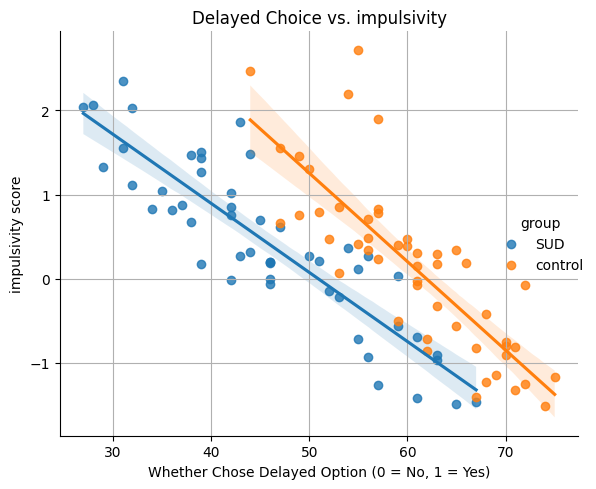

In [ ]:
## Plot delayed choices and impulsivity by patient
import matplotlib.pyplot as plt
import seaborn as sns
# color by patient group
plt.figure(figsize=(8, 6))
sns.lmplot(data=demo_sub, x='trial_count_1', y='impulsivity', hue='group')
#lmplot just provided more options
plt.title('Delayed Choice vs. impulsivity')
plt.xlabel('Delayed Choice')
plt.ylabel('impulsivity score')
plt.grid(True)
plt.tight_layout()
plt.show()